# Feature engineering
This notebook uses the information about Polish Parliment deputies scraped in the previous notebook and cleans up a database.

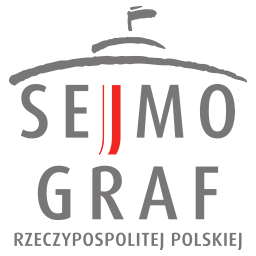


# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
# mount Google Drive on the runtime
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# create a symbolic link to a working directory
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/SEJMograf /mydrive

# navigate to the working directory
%cd /mydrive

ln: failed to create symbolic link '/mydrive/SEJMograf': File exists
/content/gdrive/My Drive/Colab Notebooks/SEJMograf


## Libraries & functions
Let's now install missing libraries and import the necessary libraries and functions we're gonna use in this notebook.

- `requests` - http handling
- `BeautifulSoup` - html parsing & web-scraping
- `urllib.request` - url-opening
- `tqdm.notebook` - loop progress bar for notebooks
- `timeit` - cell runtime check
- `numpy` - linear algebra
- `pandas` - data manipulation & analysis
- `sys` - system-specific parameters & functions
- `os` - operating system interfaces
- `os.path` - pathname manipulation
- `json` - JSON files handling

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

# import nltk
# from nltk import *
# nltk.download('stopwords')
# nltk.download('punkt')
# from nltk.corpus import stopwords
# import spacy


# !pip install ner-d
# from nerd import ner

# import requests
# import bs4
# from bs4 import BeautifulSoup
# import tqdm.notebook as tq
# import timeit


# import time


# Load data

In [4]:
df = pd.read_pickle('df_deputies.pkl')
df.head()

,name,url,picture,election_date,election_list,election_constituency,election_votes,oath_date,service_history,party,birth_date,birth_place,education,schools,occupation,number_of_speeches,interpellations_pursued,interpellations_dismissed,inquiries_pursued,inquiries_dismissed,statements,current_questions,voting_frequency,committees,delegations,groups,offices,coworkers,asset_declarations,benefit_register,emails
0,Adamczyk Andrzej,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,13-10-2019,Prawo i Sprawiedliwość,Kraków,29686,12-11-2019,"poseł V kadencji, poseł VI kadencji, poseł VII...",Klub Parlamentarny Prawo i Sprawiedliwość,04-01-1959,Krzeszowice,wyższe,"Społeczna Akademia Nauk w Łodzi, Wydział Zarzą...",parlamentarzysta,"[6, https://www.sejm.gov.pl/wypowiedzi.xsp?id=...",[],[],[],[],[],[],98.46,[],[],[],"[[*Biuro Poselskie Posła Andrzeja Adamczyka, [...","[[Adam Bielecki, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...",[],Andrzej.Adamczyk@sejm.pl
1,Adamczyk Rafał,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,13-10-2019,Sojusz Lewicy Demokratycznej,Katowice,12148,12-11-2019,brak,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",30-05-1974,Dąbrowa Górnicza,wyższe,"Politechnika Śląska, Organizacja i Zarządzanie...",samorządowiec,"[18, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],[],"[Pytania w sprawach bieżących:, https://www.se...",99.57,"[[Komisja Administracji i Spraw Wewnętrznych,...","[[Polsko-Niderlandzka Grupa Parlamentarna, /SQ...","[[Parlamentarny Zespół Antysmogowy, agent.xsp?...",[[*Biuro Poselskie Posła na Sejm RP Rafała Ada...,"[[Michał Curyło, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Rafal.Adamczyk@sejm.pl
2,Adamowicz Piotr,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,13-10-2019,Koalicja Obywatelska,Gdańsk,41795,12-11-2019,brak,Klub Parlamentarny Koalicja Obywatelska - Plat...,26-06-1961,Elbląg,średnie ogólne,VI LO GdaÅ„sk (1980),dziennikarz,"[13, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],"[Oświadczenia:, https://www.sejm.gov.plinterpe...","[Pytania w sprawach bieżących:, https://www.se...",98.71,"[[Komisja Kultury i Środków Przekazu, agent.x...","[[Grupa Parlamentarna Polska-Republika Korei, ...","[[Parlamentarny Zespół ds. Białorusi, agent.xs...","[[*Biuro Posła na Sejm RP Piotra Adamowicza, [...","[[Zofia Lisicka, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Piotr.Adamowicz@sejm.pl
3,Ajchler Romuald,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,13-10-2019,Sojusz Lewicy Demokratycznej,Piła,14438,12-11-2019,"poseł II kadencji, poseł III kadencji, poseł I...","Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",19-01-1949,Duszniki Wielkopolskie,średnie zawodowe,"PaÅ„stwowe Technikum Rolnicze, Rolnictwo - tec...",rolnik,"[42, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],[],"[Pytania w sprawach bieżących:, https://www.se...",96.54,"[[Komisja Polityki Społecznej i Rodziny, agen...",[],"[[Wielkopolski Zespół Parlamentarny, agent.xsp...",[[*Biuro Poselskie Posła na Sejm Romualda Ajch...,"[[Lidia Nowakowska, Pracownik, https://orka.se...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Romuald.Ajchler@sejm.pl
4,Andruszkiewicz Adam,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.p

## Initiate clean DataFrame

In [5]:
df_clean = pd.DataFrame()

# Clean party data

## Name

In [6]:
df_clean['first_name'] = df['name'].apply(lambda x: x.split(' ')[1])
df_clean['middle_name'] = df['name'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else None)
df_clean['last_name'] = df['name'].apply(lambda x: x.split(' ')[0])
df_clean.head()

,first_name,middle_name,last_name
0,Andrzej,None,Adamczyk
1,Rafał,None,Adamczyk
2,Piotr,None,Adamowicz
3,Romuald,None,Ajchler
4,Adam,None,Andruszkiewicz


## Profile url

In [7]:
df_clean['profile_url'] = df['url'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...


## Picture

In [8]:
df_clean['picture'] = df['picture'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...


## Election date

In [9]:
df_clean['election_date'] = df['election_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13


## Election list

In [10]:
df_clean['election_list'] = df['election_list'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość


## Election constituency

In [11]:
df_clean['election_constituency'] = df['election_constituency'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok


## Election votes

In [12]:
df_clean['election_votes'] = df['election_votes'].apply(lambda x: int(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829


## Oath date

In [13]:
df_clean['oath_date'] = df['oath_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12


## Service history

In [14]:
def historyList(string):
  if string == 'brak':
    return list()
  else:
    return string.split(', ')

df_clean['service_history'] = df['service_history'].apply(lambda x: historyList(x))

def divideHistory(lst):
  sejm = []
  senat = []
  for l in lst:
    if re.search('pos.+', l):
      sejm.append(l)
    elif re.search('sen.+', l):
      senat.append(l)
  return (sejm, senat)

df_clean['sejm_history'] = df_clean['service_history'].apply(lambda x: divideHistory(x)[0])
df_clean['senat_history'] = df_clean['service_history'].apply(lambda x: divideHistory(x)[1])

def extractTerms(lst, term):
  # term = re.compile(f'.+{term}.+')
  for l in lst:
    if re.match(f'.+\s{term}\s.+', l):
      return True
  return False


terms = ['IX', 'X', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII']

for t in terms:
  if t in ['IX', 'X']:
    col_name = f'sejm_prl_term_{t}'
  else: 
    col_name = f'sejm_term_{t}'
  df_clean[col_name] = df_clean['sejm_history'].apply(lambda x: extractTerms(x, t))

for t in terms:
  if t in ['IX', 'X']:
    col_name = f'senat_prl_term_{t}'
  else: 
    col_name = f'senat_term_{t}'
  df_clean[f'senat_term_{t}'] = df_clean['senat_history'].apply(lambda x: extractTerms(x, t))

df_clean['sejm_term_IX'] = True

df_clean.drop(['service_history', 'sejm_history', 'senat_history'], axis=1, inplace=True)

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


## Party

In [15]:
df_clean['club'] = df['party'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S..."
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S..."
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość


# Clean CV data

## Birth date

In [16]:
df_clean['birth_date'] = df['birth_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30


## Birth place

In [17]:
df_clean['birth_place'] = df['birth_place'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo


## Education

In [18]:
df_clean['education'] = df['education'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe


## Schools

### School name

In [19]:
def schoolName(name):
  split_name = name.split(', ')
  name = str(split_name[0])
  return name

def stripYear(name):  
  return re.sub('\(\d{4}\)', '', name)

def fixChars(name):
  name = name.replace('Å„', 'ń')
  name = name.replace('Å', 'ł')
  return name.strip()

df_clean['school'] = df['schools'].apply(lambda x: schoolName(x))
df_clean['school'] = df_clean['school'].apply(lambda x: stripYear(x))
df_clean['school'] = df_clean['school'].apply(lambda x: fixChars(x))

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku


### Faculty

In [20]:
# # def faculty(name):
# #   search = re.search('Wydział.+-\s', name)
# #   if search == None:
# #     # print(name)
# #     return None, None
# #   else:
# #     search = search.group(0).rstrip(' -')
# #     items = search.split(', ')


# #     if len(items) == 1:
# #       faculty = items[0]
# #       field = None
# #     elif len(items) == 2:
# #       faculty = items[0]
# #       field = items[-1]      
# #     elif len(items) == 3:
# #       print(items)
# #       if items[2].startswith('Inz'):
# #         faculty = items[0]
# #         field = ', '.join([items[1], items[2]])
# #       elif re.match('^[A-Z]', items[2]):
# #         faculty = ', '.join([items[0], items[1]])
# #         field = items[2]
# #       elif re.match('^[a-z]', items[2]):
# #         faculty = items[0]
# #         field = ', '.join([items[1], items[2]])
      
# #       print(f'Faculty: {faculty}\nField: {field}\n\n')

# #     return faculty, field

# def faculty(name):
#   s1 = re.search('.*[Uu]ni.*', name)
#   s2 = re.search('.*[Aa]kad.*', name)
#   s3 = re.search('.*[Pp]oli.*', name)
#   s4 = re.search('.*[Ww]yższ.*', name)
#   s5 = re.search('.*[Gg]łów.*', name)
#   s6 = re.search('.*[Uu]czel', name)
#   s7 = re.search('.*[Cc]olle', name)
#   if s1:
#     search = s1.group(0)
#     items = search.split(', ')
#     if items[1].startswith('Wydzia'):
#       faculty = items[1]
#     else:
#       print(items[1:])
    

#     # print(items[1:])
#   else:
#     # print(name)
#     pass
  

# df_clean['faculty'] = df['schools'].apply(lambda x: faculty(x))
# df_clean['field'] = df['schools'].apply(lambda x: faculty(x))
# df_clean.head()

### Academic title

In [21]:
def academicTitle(name):
  search = re.search('-\s[a-z]+\s\(', name)
  if search == None:
    return None
  else:
    search = search.group(0).lstrip('- ').rstrip(' (')
    return search

df_clean['title'] = df['schools'].apply(lambda x: academicTitle(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister


###Graduation year

In [22]:
def schoolYear(name):
  search = re.search('\d{4}', name)
  if search == None:
    return None
  else:
    search = datetime.strptime(search.group(0), '%Y').year
    return search

df_clean['graduation_year'] = df['schools'].apply(lambda x: schoolYear(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0


## Occupation

In [23]:
def occupation(name):
  if re.search('.*[Pp]arlam.*|.*[Pp]os.*|.*[Pp]olityk', name):
    return 'poseł'

  elif re.search('.*[Uu]rz.*|.*[Pp]racow.*|.*[Ss]ekret.*', name):
    return 'urzędnik'

  elif re.search('.*[Ss]amorz.*', name):
    return 'samorządowiec'
  
  elif re.search('.*[Aa]dwok.*|.*[Pp]rawn.*', name):
    return 'prawnik/adwokat'

  elif re.search('.*[Nn]auczy.*|.*[Ww]ykład.*|.*[Ee]duk.*|[Pp]rofeso.*', name):
    return 'nauczyciel/wykładowca'

  elif re.search('.*[Dd]zienn.*|.*[Pp]ublic.*', name):
    return 'dziennikarz/publicysta'

  elif re.search('.*[Ll]eka.*', name):
    return 'lekarz'

  elif re.search('.*[Ee]konom.*', name):
    return 'ekonomista'

  elif re.search('.*[Pp]olitol.*', name):
    return 'politolog' # to kill

  elif re.search('.*[Hh]istor.*', name):
    return 'historyk' # to kill

  elif re.search('.*[Pp]rzeds.*', name):
    return 'przedsiębiorca'

  elif re.search('.*[Ff]ilol.*', name):
    return 'filolog'

  elif re.search('.*[Ss]ocjo.*', name):
    return 'socjolog'

  elif re.search('.*[Mm]en.dżer.*', name):
    return 'menedżer'

  elif re.search('.*[Ii]nż.*', name):
    return 'inżynier'

  elif re.search('.*[Rr]olnik.*', name):
    return 'rolnik'

  elif re.search('.*[Aa]ktor.*|.*[Rr]eż.*', name):
    return 'aktor/reżyser'

  elif re.search('.*[Ff]iloz.*', name):
    return 'filozof'

  else:
    return name

df_clean['occupation'] = df['occupation'].apply(lambda x: occupation(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł


# Clean activity data

## Speeches

In [24]:
def speeches(name):
  if len(name) == 2:
    number = int(name[0])
    url = name[1]
  else:
    number = 0
    url = None
  return number, url

df_clean['speeches_number'] = df['number_of_speeches'].apply(lambda x: speeches(x)[0])
df_clean['speeches_url'] = df['number_of_speeches'].apply(lambda x: speeches(x)[1])
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...


In [25]:
df_clean.sort_values('speeches_number')

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url
350,Andrzej,None,Sośnierz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5BC3B...,2019-10-13,Prawo i Sprawiedliwość,Katowice,6061,2019-11-12,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1951-05-08,Głuchołazy,wyższe,Śląska Akademia Medyczna,lekarz,1975.0,lekarz,0,None
109,Mariusz,None,Gosek,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/F5436...,2019-10-13,Prawo i Sprawiedliwość,Kielce,4621,2020-02-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1982-08-20,Kielce,wyższe,Akademia Świętokrzyska,None,2005.0,pedagog,0,None
101,Teresa,None,Glenc,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/C4E86...,2019-10-13,Prawo i Sprawiedliwość,Bielsko-Biała,14274,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1958-05-27,Gorzyczki,wyższe,Wyższa Szkoła Pedagogiczna w Opolu,magister,1985.0,poseł,0,None
94,Grzegorz,None,Gaża,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/15131...,2019-10-13,Prawo i Sprawiedliwość,Bielsko-Biała,11526,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1972-03-23,Pszczyna,średnie policealne/pomaturalne,Zespół Szkół Budowlano-Mechanicznych,technik,1992.0,przedsiębiorca,0,None
366,Aleksandra,None,Szczudło,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/C326D...,2019-10-13,Prawo i Sprawiedliwość,Białystok,12222,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1983-09-22,Ciechanowiec,wyższe,Uniwersytet w Białymstoku,magister,2008.0,dyrektor do spraw energetyki,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Dariusz,None,Klimczak,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/66B88...,2019-10-13,Polskie Stronnictwo Ludowe,Piotrków Trybunalski,15977,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Klub Parlamentarny Koalicja Polska - PSL, UED,...",1980-06-17,Rawa Mazowiecka,wyższe,Uniwersytet Jagielloński w Krakowie,magister,2005.0,historyk,100,https://www.sejm.gov.pl/wypowiedzi.xsp?id=160&...
365,Michał,None,Szczerba,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/B6A09...,2019-10-13,Koalicja Obywatelska,Warszawa,13747,2019-11-12,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1977-12-14,Warszawa,wyższe,Uniwersytet Warszawski,None,2001.0,poseł,124,https://www.sejm.gov.pl/wypowiedzi.xsp?id=367&...
283,Krzysztof,None,Paszyk,https://www.sejm.gov.pl/Sejm9

## Interpellations

In [26]:
def interpellations(name):
  if len(name) == 0:
    number = 0
    url = None
  else:
    number = int(name[2])
    url = name[1]

  return number, url

df_clean['interpellations_pursued_number'] = df['interpellations_pursued'].apply(lambda x: interpellations(x)[0])
df_clean['interpellations_pursued_url'] = df['interpellations_pursued'].apply(lambda x: interpellations(x)[1])
df_clean['interpellations_dismissed_number'] = df['interpellations_dismissed'].apply(lambda x: interpellations(x)[0])
df_clean['interpellations_dismissed_url'] = df['interpellations_dismissed'].apply(lambda x: interpellations(x)[1])
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None


## Inquiries

In [27]:
def inquiries(name):
  if len(name) == 0:
    number = 0
    url = None
  else:
    number = int(name[2])
    url = name[1]
    
  return number, url

df_clean['inquiries_pursued_number'] = df['inquiries_pursued'].apply(lambda x: inquiries(x)[0])
df_clean['inquiries_pursued_url'] = df['inquiries_pursued'].apply(lambda x: inquiries(x)[1])
df_clean['inquiries_dismissed_number'] = df['inquiries_dismissed'].apply(lambda x: inquiries(x)[0])
df_clean['inquiries_dismissed_url'] = df['inquiries_dismissed'].apply(lambda x: inquiries(x)[1])
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None,0,None,0,None


## Statements

In [28]:
def statements(name):
  if len(name) == 0:
    number = 0
    url = None
  else:
    number = int(name[2])
    url = name[1]
    
  return number, url

df_clean['statements_number'] = df['statements'].apply(lambda x: statements(x)[0])
df_clean['statements_url'] = df['statements'].apply(lambda x: statements(x)[1])

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url,statements_number,statements_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None,0,None
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,4,https://www.sejm.gov.plinterpelacje.xsp?symbol...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None,0,None,0,None,0,None


## Current questions

In [29]:
def questions(name):
  if len(name) == 0:
    number = 0
    url = None
  else:
    number = int(name[2])
    url = name[1]
    
  return number, url

df_clean['current_questions_number'] = df['current_questions'].apply(lambda x: questions(x)[0])
df_clean['current_questions_url'] = df['current_questions'].apply(lambda x: questions(x)[1])

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url,statements_number,statements_url,current_questions_number,current_questions_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None,0,None,0,None
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,4,https://www.sejm.gov.plinterpelacje.xsp?symbol...,1,https://www.sejm.gov.plagent.xsp?symbol=POSELI...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None,0,None,0,None,0,None,0,None


## Voting frequency

In [30]:
df_clean['voting_frequency'] = df['voting_frequency'].apply(lambda x: float(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url,statements_number,statements_url,current_questions_number,current_questions_url,voting_frequency
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None,0,None,0,None,98.46
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,99.57
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,4,https://www.sejm.gov.plinterpelacje.xsp?symbol...,1,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,98.71
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,96.54
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None,0,None,0,None,0,None,0,None,98.

# Committees

In [47]:
committees = set()
for item in df['committees']:
  
  if len(item) != 0:
    # print(item[0][0])
    committees.add(item[0][0])

committees

{'Komisja  Administracji i Spraw Wewnętrznych',
 'Komisja  Cyfryzacji, Innowacyjności i Nowoczesnych Technologii',
 'Komisja  Edukacji, Nauki i Młodzieży',
 'Komisja  Etyki Poselskiej',
 'Komisja  Finansów Publicznych',
 'Komisja  Gospodarki Morskiej i Żeglugi Śródlądowej',
 'Komisja  Gospodarki i Rozwoju',
 'Komisja  Infrastruktury',
 'Komisja  Kultury Fizycznej, Sportu i Turystyki',
 'Komisja  Kultury i Środków Przekazu',
 'Komisja  Mniejszości Narodowych i Etnicznych',
 'Komisja  Obrony Narodowej',
 'Komisja  Ochrony Środowiska, Zasobów Naturalnych i Leśnictwa',
 'Komisja  Odpowiedzialności Konstytucyjnej',
 'Komisja  Polityki Senioralnej',
 'Komisja  Polityki Społecznej i Rodziny',
 'Komisja  Regulaminowa, Spraw Poselskich i Immunitetowych',
 'Komisja  Rolnictwa i Rozwoju Wsi',
 'Komisja  Samorządu Terytorialnego i Polityki Regionalnej',
 'Komisja  Spraw Zagranicznych',
 'Komisja  Sprawiedliwości i Praw Człowieka',
 'Komisja  Ustawodawcza',
 'Komisja  Zdrowia',
 'Komisja  do Spraw 

## Delegations

In [48]:
delegations = set()
for item in df['delegations']:
  
  if len(item) != 0:
    delegations.add(item[0][0])

delegations

{'Delegacja Parlamentarna do Zgromadzenia Parlamentarnego RP i Ukrainy',
 'Delegacja Sejmu i Senatu RP do Wymiaru Parlamentarnego Inicjatywy Środkowoeuropejskiej',
 'Delegacja Sejmu i Senatu RP do Zgromadzenia Parlamentarnego NATO',
 'Delegacja Sejmu i Senatu RP do Zgromadzenia Parlamentarnego OBWE',
 'Delegacja Sejmu i Senatu RP do Zgromadzenia Parlamentarnego Sejmu i Senatu RP i Sejmu Republiki Litewskiej',
 'Delegacja Sejmu i Senatu RP na Konferencję Parlamentarną Morza Bałtyckiego',
 'Delegacja Sejmu i Senatu do Zgromadzenia Parlamentarnego Rady Europy',
 'Delegacja do Zgromadzenia Parlamentarnego Rzeczypospolitej Polskiej i Gruzji',
 'Delegacja do Zgromadzenia Parlamentarnego Rzeczypospolitej Polskiej i Republiki Mołdawii',
 'Grupa Parlamentarna Polska-Macedonia Północna',
 'Grupa Parlamentarna Polska-Republika Korei',
 'Grupa Parlamentarna Polska-Zjednoczone Emiraty Arabskie',
 'Polska Sekcja Stowarzyszona Zgromadzenia Parlamentarnego Frankofonii',
 'Polsko-Austriacka Grupa Parla

## Groups

In [49]:
groups = set()
for item in df['groups']:
  
  if len(item) != 0:
    groups.add(item[0][0])

groups

{'Dolnośląski Zespół Parlamentarny',
 'Karkonoski Zespół Parlamentarny',
 'Lubelski Zespół Parlamentarny',
 'Lubuski Zespół Parlamentarny',
 'Opolski Zespół Parlamentarny',
 'Parlamentarna Grupa Kobiet',
 'Parlamentarny Zespół Antysmogowy',
 'Parlamentarny Zespół Byłych Działaczy Ruchu Studenckiego "Ordynacka"',
 'Parlamentarny Zespół Członków i Sympatyków Ruchu Światło-Życie i Akcji Katolickiej',
 'Parlamentarny Zespół Karpacki',
 'Parlamentarny Zespół Miłośników Historii',
 'Parlamentarny Zespół Przyjaciół Królewskiego Miasta Sandomierza',
 'Parlamentarny Zespół Przyjaciół Zwierząt',
 'Parlamentarny Zespół Sportowy',
 'Parlamentarny Zespół Strażaków',
 'Parlamentarny Zespół Tradycji i Pamięci Żołnierzy Wyklętych',
 'Parlamentarny Zespół Wspierania Krajowej Administracji Skarbowej i Rozbudowy Przejść Granicznych',
 'Parlamentarny Zespół do spraw Polityki Migracyjnej i Integracyjnej',
 'Parlamentarny Zespół do spraw Przyszłości Pracy',
 'Parlamentarny Zespół do spraw Równouprawnienia S

In [34]:
# df_clean[['first_name', 'last_name', 'election_list', 'voting_frequency', 'birth_place']].groupby('birth_place').mean().sort_values('voting_frequency')

In [ ]:
# for x in df['schools']:
#   splt = x.split(', ')
#   print(x+'\n'+str(len(splt))+'\n\n')

In [ ]:
# # df_clean[df_clean['school_name'] == 'Liceum Ogólnokształcące im. Adama Mickiewicza w Lubaniu']
# df_clean[df_clean['school_name'] == 'Karkonoska Państwowa Szkoła Wyższa w Jeleniej Górze']
# # df_clean['school_name'].unique()

In [ ]:
# !pip install gmaps
# !pip install colab-env -qU

# import colab_env
# import os
# import gmaps
# # https://github.com/pbugnion/gmaps

In [ ]:
# import gmaps
# import gmaps.datasets
# key = os.getenv('GMAPS_KEY')
# gmaps.configure(api_key=key) # Your Google API key

# df = gmaps.datasets.load_dataset_as_df('starbucks_kfc_uk')

# starbucks_df = df[df['chain_name'] == 'starbucks']
# starbucks_df = starbucks_df[['latitude', 'longitude']]

# starbucks_layer = gmaps.symbol_layer(
#     starbucks_df, fill_color="green", stroke_color="green", scale=2
# )
# fig = gmaps.figure()
# fig.add_layer(starbucks_layer)
# fig

In [ ]:
# container = set()
# for row in df_clean['service_history']:
#   for item in row:
#     container.add(item)
# container

https://spacy.io/models

https://www.nltk.org/api/nltk.html

http://nlp.pwr.wroc.pl/en/

http://plwordnet.pwr.wroc.pl/wordnet/

http://zil.ipipan.waw.pl/LemmaPL

http://morfeusz.sgjp.pl/

https://ichi.pro/pl/cos-z-niczego-uzyj-nlp-i-ml-do-wyodrebniania-i-strukturyzacji-danych-internetowych-69585767705363